In [53]:
# 0. Computer vision libs
import torch 
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+rocm6.1
0.21.0+rocm6.1


In [54]:
train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=torchvision.transforms.ToTensor(), target_transform=None)
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor(), target_transform=None)

In [55]:
len(train_data), len(test_data)

(60000, 10000)

In [56]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [57]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [58]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [59]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [60]:
# 1.1 check shape 
image.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, '9')

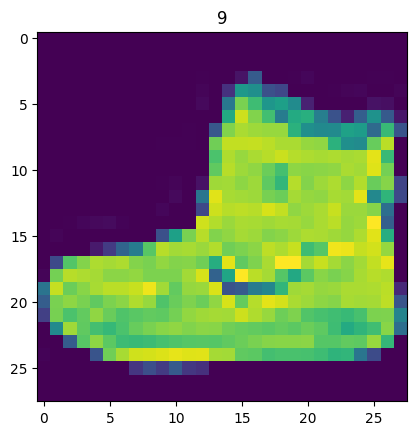

In [61]:
#1.2 Visualizing data
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

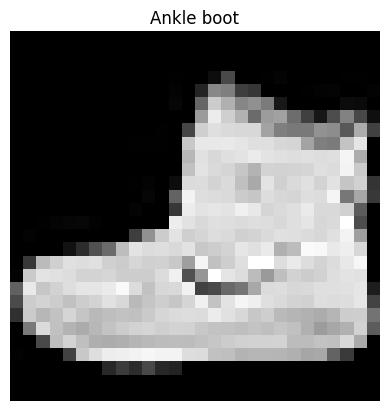

In [62]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

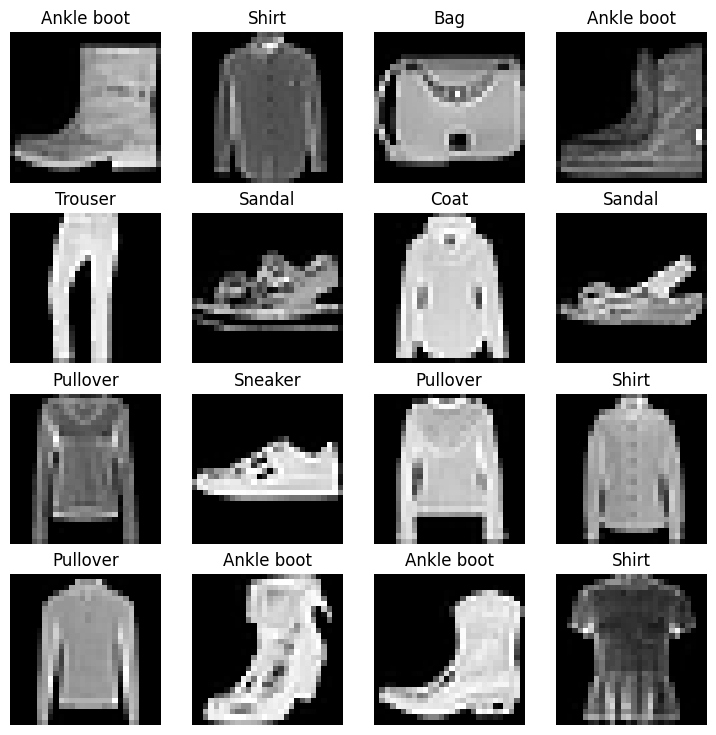

In [63]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [64]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [65]:
# 2. prepare DataLoader
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b3d76894cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b3e7c799480>)

In [66]:
#Lets check out what what we ve created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7b3d76894cd0>, <torch.utils.data.dataloader.DataLoader object at 0x7b3e7c799480>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [67]:
# Check out whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, size: torch.Size([])


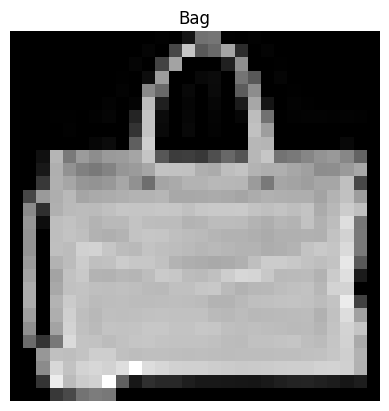

In [68]:
# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f'Image size: {image.shape}')
print(f'Label: {label}, size: {label.shape}')

In [69]:
# Model 0: baseline model

#Create flatten layer
flatten_model = nn.Flatten()

# Get a single sample 
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) 

# print out what happend
print(f'Shape before flattening: {x.shape}')
print(f'Shape after flattening: {output.shape}')

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [70]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [71]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(28*28, 10, len(class_names))
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [72]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [73]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [74]:
# 3.1 loss, optim and evaluation metrics
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [75]:
# 3.2 Create a func to time our experiments
from timeit import default_timer as timer
def print_train_time(start: float, end: float):
    total_time = end - start
    print(f'train time: {total_time:.3f} seconds')
    return total_time

In [76]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time, end=end_time)

train time: 0.000 seconds


1.3795000086247455e-05

In [77]:
# 3.3 trainig loop and training model on batches of data
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start = timer()

#Set the number of epochs (we'll keep this small for faster training)
epochs = 3

# training and testing loop

for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n------')
    train_loss = 0
    # add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f'Looked at {batch * len(X)} / {len(train_dataloader.dataset)}')

    # Devide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(test_dataloader)

        # Calculate the test acc average per batch
        test_acc /= len(test_dataloader)
    print(f'\nTrain loss: {train_loss:.4f} | test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}')

train_time_end = timer()
total_train_time_model_0 = print_train_time(start=train_time_start, end=train_time_end)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.5904 | test loss: 0.5095 | Test acc: 82.0387
Epoch: 1
------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.4763 | test loss: 0.4799 | Test acc: 83.1969
Epoch: 2
------
Looked at 0 / 60000
Looked at 12800 / 60000
Looked at 25600 / 60000
Looked at 38400 / 60000
Looked at 51200 / 60000

Train loss: 0.4550 | test loss: 0.4766 | Test acc: 83.4265
train time: 7.469 seconds


In [78]:
next(model_0.parameters()).device

device(type='cpu')

In [79]:
# 4. make preds
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            y_pred = model(X)

            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,loss_fn = loss_fn, accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [80]:
# 5 agnostic code

In [81]:
# 6 Model 1: non-linearity
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [82]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names))
model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [83]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [84]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    
    train_loss, train_acc = 0, 0
    model.train()

    for batch, (X, y) in enumerate(data_loader):
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f'Train loss: {train_loss:.5f}, | Train acc: {train_acc:.2f}%')

In [85]:
def test_step(model : torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    
    test_loss, test_acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f'Test loss; {test_loss:.5f} | Test acc: {test_acc:.2f}%\n')

In [86]:
torch.manual_seed(42)

train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f'epoch: {epoch}\n==========')
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn)
    test_step(model_1, test_dataloader, loss_fn, accuracy_fn)
train_time_end = timer()
total_train_time_model_1 = print_train_time(train_time_start, train_time_end)


  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
Train loss: 1.09199, | Train acc: 61.34%
Test loss; 0.95636 | Test acc: 65.00%

epoch: 1
Train loss: 0.78101, | Train acc: 71.93%
Test loss; 0.72227 | Test acc: 73.91%

epoch: 2
Train loss: 0.67027, | Train acc: 75.94%
Test loss; 0.68500 | Test acc: 75.02%

train time: 7.339 seconds


In [87]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [88]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [89]:
#6 Model 2: Build a CNN!
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        
        x = self.conv_block_2(x)
        
        x = self.classifier(x)
        return x    

In [90]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(1, 10, output_shape=len(class_names))

In [91]:
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f'Image batch shape: {images.shape}')
print(f'Single image shape: {test_image.shape}')
print(f'Test image:\n {test_image}')

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[-0.0793,  1.6144, -0.4617,  ..., -0.3390,  0.1549, -0.2794],
         [-0.5967,  0.0242,  0.8264,  ...,  0.5394,  0.0590,  0.2875],
         [ 0.0881, -0.0106,  2.0317,  ...,  0.6341, -0.5408,  1.3265],
         ...,
         [ 0.5949,  1.0955,  0.7693,  ..., -0.5738,  0.9187,  0.7561],
         [ 0.4068,  0.9570,  0.2887,  ...,  0.1231,  0.7267,  0.3002],
         [ 1.9694,  0.9515,  1.3571,  ..., -0.7764, -0.4411, -0.2924]],

        [[-0.0115, -0.5974,  2.0710,  ..., -1.6814,  0.9977,  0.6090],
         [-1.2258,  1.6480, -1.4137,  ...,  0.7258,  0.8074, -0.7784],
         [ 1.4650, -0.3883, -0.5527,  ...,  0.5641,  0.2478, -0.1571],
         ...,
         [ 1.5853,  1.6764,  0.3468,  ...,  0.6637, -0.8358,  0.3972],
         [-1.4526,  0.4073,  0.3668,  ...,  0.8799,  0.6329, -0.3277],
         [ 0.6710, -2.3354, -0.2408,  ..., -0.3148, -0.6067, -1.9394]],

        [[-0

In [92]:
# Create a single conv2d layer
torch.manual_seed(42)
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)

conv_output = conv_layer(test_image)
conv_output

tensor([[[ 0.4308,  1.2368, -0.6056,  ..., -0.5771,  0.5092,  0.6029],
         [ 0.1728,  0.1201,  0.3334,  ...,  0.9820, -0.3648,  0.3929],
         [-0.5700, -0.2093,  1.4068,  ..., -0.4570,  0.6664,  0.4407],
         ...,
         [-0.1123,  0.2007,  0.0256,  ..., -0.2485, -0.2937,  1.2019],
         [ 1.4382,  1.1859, -0.6891,  ...,  0.0615, -0.1020, -0.1389],
         [-0.3151,  0.1077,  0.4338,  ..., -0.0351, -0.2374, -0.3865]],

        [[ 0.0705, -0.4075, -0.6670,  ..., -0.1650, -1.1660, -0.1443],
         [ 0.0360, -0.2798,  0.7168,  ...,  1.1139, -0.1128,  0.8921],
         [-1.5408, -0.4789, -1.0191,  ...,  0.1810,  0.6157, -0.8785],
         ...,
         [-0.2540,  0.6555, -1.2796,  ..., -0.1566, -0.5915, -0.0778],
         [ 0.3122, -1.3105,  0.2163,  ..., -0.3659,  0.6624,  0.3876],
         [ 0.0356, -0.3588, -0.0515,  ..., -0.3323, -0.3442, -1.2892]],

        [[-0.2347,  0.0972,  0.1598,  ..., -0.5194, -0.0770,  0.5179],
         [ 0.4966,  0.4623, -0.0750,  ...,  0

In [93]:
test_image.shape

torch.Size([3, 64, 64])

In [94]:
max_pool_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = conv_layer(test_image)
test_image_through_conv.shape

torch.Size([10, 62, 62])

In [95]:
x = max_pool_layer(test_image_through_conv)
x.shape

torch.Size([10, 31, 31])

In [96]:
# 7. Setup loss func/eval metrics/optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [97]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n-------------')
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2, train_time_end_model_2)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------------
Train loss: 0.59203, | Train acc: 78.52%
Test loss; 0.39263 | Test acc: 85.91%

Epoch: 1
-------------
Train loss: 0.36232, | Train acc: 87.04%
Test loss; 0.34975 | Test acc: 87.33%

Epoch: 2
-------------
Train loss: 0.32416, | Train acc: 88.25%
Test loss; 0.32896 | Test acc: 88.13%

train time: 24.768 seconds


In [99]:
# get model 2 results
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32895955443382263,
 'model_acc': 88.12899361022365}

In [101]:
# 8. Compare model results and training time
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.328960,88.128994


In [102]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,7.469091
1,FashionMNISTModelV1,0.685001,75.019968,7.339498
2,FashionMNISTModelV2,0.328960,88.128994,24.768129


Text(0, 0.5, 'model')

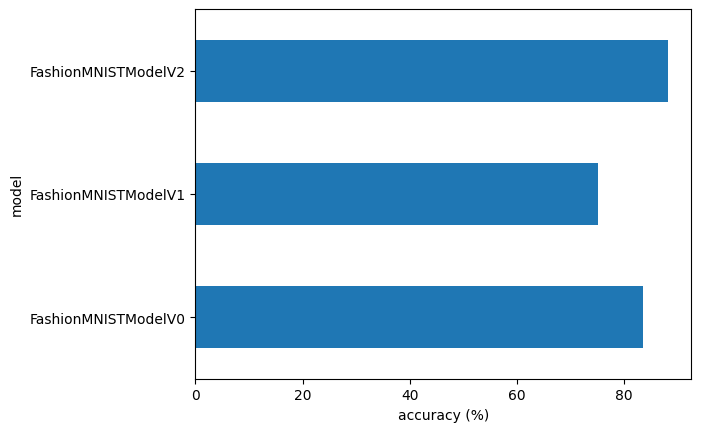

In [103]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

In [104]:
# 9. make and evaluate random preds with best model
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob)
    return torch.stack(pred_probs)

In [126]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

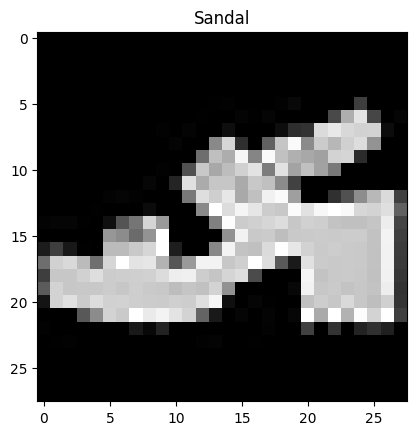

In [108]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [122]:
# make preds
pred_probs = make_predictions(model_2, test_samples)
pred_probs[:2]

tensor([[1.8149e-02, 6.1246e-04, 1.7762e-01, 1.6830e-03, 7.7208e-01, 1.3416e-05,
         2.8056e-02, 3.6448e-05, 1.6674e-03, 8.6401e-05],
        [7.0330e-05, 9.8959e-06, 1.0514e-02, 9.4096e-05, 9.8622e-01, 1.0082e-07,
         2.8780e-03, 4.3880e-07, 2.1456e-04, 1.7306e-06]])

In [123]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([4, 4, 6, 3, 2, 2, 0, 1, 1])

In [124]:
test_labels

[2, 4, 6, 3, 2, 2, 0, 1, 1]

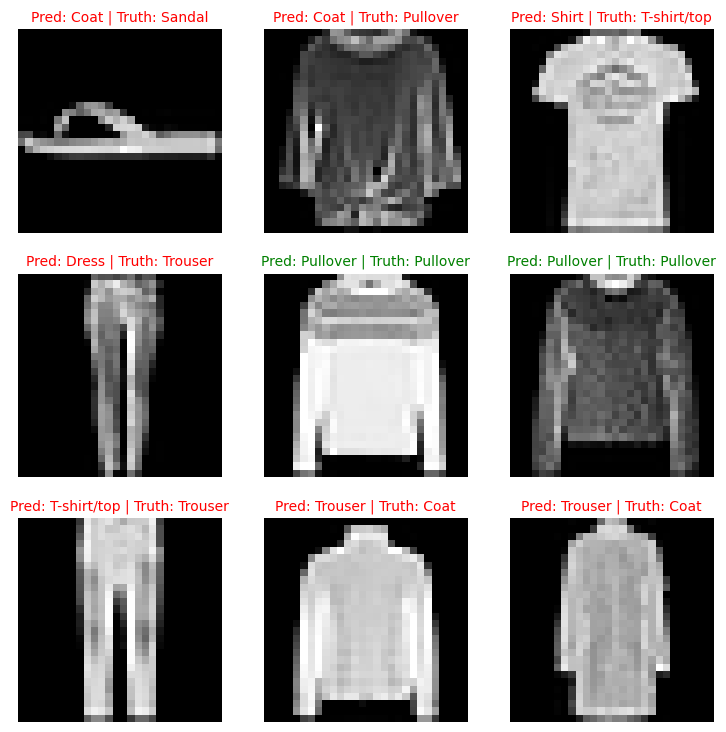

In [127]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap='gray')

    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f'Pred: {pred_label} | Truth: {truth_label}'
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')

    plt.axis(False)